# Working with MERFISH data

In [1]:
import stlearn as st
import scanpy as sc
# Ingore all warnings
import warnings
warnings.filterwarnings("ignore")

# Setting figure parameters
st.settings.set_figure_params(dpi=120)

Read MERFISH data follow the instruction from scanpy

In [2]:
import urllib.request

url_coord = "https://www.pnas.org/highwire/filestream/887973/field_highwire_adjunct_files/15/pnas.1912459116.sd15.xlsx"
filename_coord = "pnas.1912459116.sd15.xlsx"
urllib.request.urlretrieve(url_coord, filename_coord)

url_counts = "https://www.pnas.org/highwire/filestream/887973/field_highwire_adjunct_files/12/pnas.1912459116.sd12.csv"
filename_counts = "pnas.1912459116.sd12.csv"
urllib.request.urlretrieve(url_counts, filename_counts)

('pnas.1912459116.sd12.csv', <http.client.HTTPMessage at 0x7f3d7274d8b0>)

In [3]:
data = st.ReadMERFISH(count_matrix_file="pnas.1912459116.sd12.csv",
              spatial_file="pnas.1912459116.sd15.xlsx")

Quality checking for the data

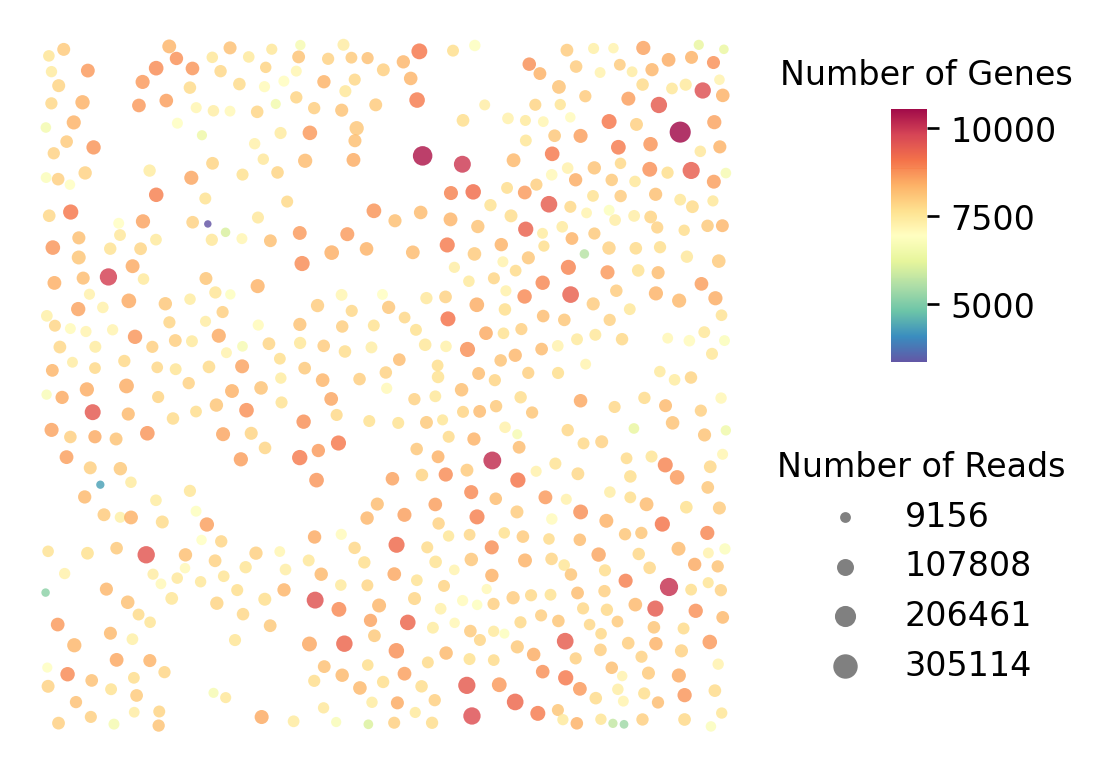

In [4]:
st.pl.QC_plot(data)

Running Preprocessing for MERFISH data

In [5]:
st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.log1p(data)
st.pp.scale(data)

Normalization step is finished in adata.X
Log transformation step is finished in adata.X
Scale step is finished in adata.X


Running PCA to reduce the dimensions to 50

In [6]:
st.em.run_pca(data,n_comps=50,random_state=0)

PCA is done! Generated in adata.obsm['X_pca'], adata.uns['pca'] and adata.varm['PCs']


Perform Louvain clustering

In [7]:
st.pp.neighbors(data,n_neighbors=25)

Created k-Nearest-Neighbor graph in adata.uns['neighbors'] 


In [8]:
st.tl.clustering.louvain(data)

Applying Louvain clustering ...
Louvain clustering is done! The labels are stored in adata.obs['louvain']


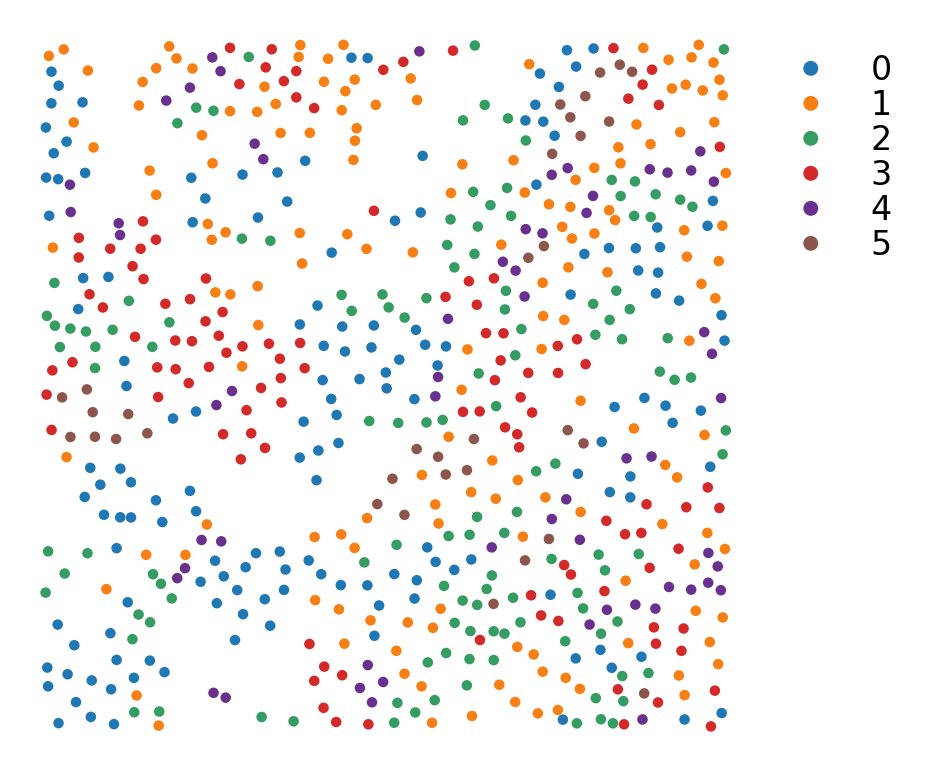

In [9]:
st.pl.cluster_plot(data,use_label="louvain",size=10)